### <center> 《数据挖掘与机器学习》
#### <center> 第4讲 线性模型与朴素贝叶斯分类

#### 目录

1.线性模型  
  - 线性回归  
  - Logistic回归    
  - Lasso回归  
  - Ridge回归  
  - 线性判别分析LDA 

2.朴素贝叶斯分类  

#### <center> Section1 Linear model


#### 1.1 Linear regression
给定n个特征的示例$x=(x_1,x_2,\cdots,x_n) \in R^{n} $, 线性模型是一个通过特征的线性组合来进行预测的函数，即
$$ y = f(x) = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n +b, $$
其中(w,b)是参数，学得之后模型就得确定。

向量形式: $f(x) = w^Tx + b$.

线性模型的优点：  
1.形式简单、易于建模；  
2.许多功能更为强大的非线性模型可在线性模型的基础上引入层级结构或高维映射得到；  
3.w直观地表达了各个属性在预测中的重要性，因此线性模型具有很好的可解释性。

示例：

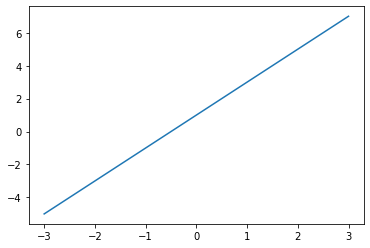

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100)
y = 2*x + 1
plt.plot(x,y)
plt.show()

**Question**  

给定数据集$D=\{(x_1,y_1),(x_2,y_2),\cdots,(x_m,y_m)\}$, 其中$x_i\in R^n, y \in R$。

“线性回归”旨在学习一个线性模型以尽可能准确地预测输出标记。

如何确定参数w和b呢？

关键在于如何衡量$f(x)$ 和y 的差距。

均方误差是回归任务中最常用的性能度量，因此我们不妨让均方误差最小化，即
$$ (w^*,b^*) = \arg \min_{w,b} L(w,b) = \sum_{i=1}^m (wx_i + b - y_i)^2 $$

基于均方误差最小化来进行模型求解的方法称为“最小二乘法”（least square method）.

**Solution**


令$X = [(x_1,x_2,\cdots,x_m)^T,I_{m\times 1}]$,求L(w,b)关于$\theta=(w;b)$的偏导数,令其等于0，
$$ \frac{\partial L}{\partial \theta} = 2X^T(X\theta - y) = 0.$$

* 当$X^TX$是满秩矩阵或正定矩阵时，$\theta  = (X^TX)^{-1}X^Ty$.
* 现实任务中，$X^TX$往往不是满秩矩阵，此时存在多个$\hat \theta$ 都能使均方误差最小，即解不唯一。此时选择哪一个解作为输出，将由学习算法的先验假设决定，常见的先验假设引入做法是加入正则化（regularization）项.



**Example 1**

* 真实模型：$ y = f(x) = x_1 + 2*x2 + 3*x_3 + x_4 + 1 $

* 样本数据：$x_i \in U(-1,1) $, 均匀采样1000个点,   $y_i = f(x_i) + \epsilon, \epsilon \sim N(0,v_0)$.

In [2]:
# generate data
import numpy as np
n = 1000
fnum = 4
X = 2*np.random.rand(n,fnum) - 1
x1 = X[:,0]
x2 = X[:,1] 
x3 = X[:,1]  
x4 = X[:,3]
y =  x1 + 2*x2 + 3*x3 + x4 + 1 + 0.1*np.random.randn(n,)

# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
ypred = model.predict(X)

# check performance
w = model.coef_
b = model.intercept_
print('w = ',w)
print('b = ',b)


w =  [ 9.99484221e-01  5.00843493e+00 -1.72464881e-04  9.94235147e-01]
b =  0.9953994418664441


**Multi-colinearity**

多重共线性指线性回归模型中的解释变量之间由于存在精确相关关系或高度相关关系而使模型估计失真或难以估计准确。

多重共线性导致的后果就是自变量的系数存在较大的不确定性。

** 广义线性模型 **

假设g(x)是单调可微函数，$$ y = g^{-1}(xw + b), $$ 这样的到的模型称为“广义线性模型”，其中函数$g(\cdot)$称为联系函数(link function).

** 优缺点 **
- 原理简单，易于实现
- 计算代价小
- 模型具有很好的可解释性
- 当特征存在高度相关性时，存在严重的共线性问题
- 不能处理非线性数据


##### 1.2 Logistic regression

** Question **

上一节讨论了如何使用线性模型进行回归学习，如果对于分类任务该如何进行？

考虑二分类任务，其输出标记$y\in\{0,1\}$,而线性回归模型的输出值z是连续实值，于是，我们需要将实值z转换为0/1值。最理想的是“单位阶跃函数”(unit-step function)
\begin{equation}
y = 
\left \{
\begin{aligned}
    0,   & z<0 \\
    0.5,  & z=0 \\
    1,   & z>0
\end{aligned}
\right .
\end{equation}

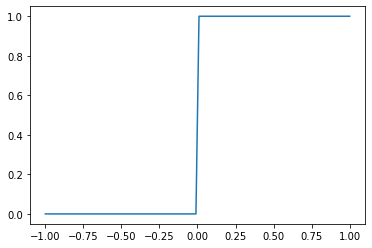

In [78]:
import matplotlib.pyplot as plt
x = np.linspace(-1,1,201)
y = np.zeros(201,)
y[100] = 0.5
y[101:] = 1
plt.plot(x,y)
plt.title('unit-step function')
plt.show()

单位阶跃函数不连续，我们希望找一个单调可微的“替代函数”，例如如下的logistic function：
$$ p = \frac{1}{1+e^{-z}} $$

logistic函数是一种“Sigmoid函数”，它将z值转化为一个接近0或者1的y值，并且其输出值在z=0附近变化很陡峭。

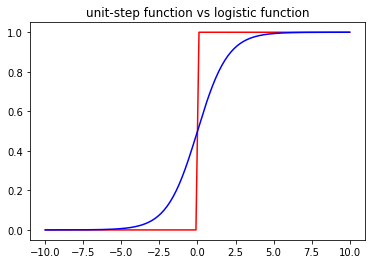

In [80]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,201)
y = np.zeros(201,)
y[100] = 0.5
y[101:] = 1
y2 = 1/(1 + np.exp(-x))
plt.plot(x,y,'r',x,y2,'b')
plt.title('unit-step function vs logistic function')
plt.show()

** problem formulation **

令$z=wx+b$,并进行变形可得到
$$ \ln \frac{p}{1-p} = wx+b $$

若将p视作样本x是正例（y=1）的可能性，则1-p是其反例可能性，两者的比值
$\frac{p}{1-p}$ 称为“几率”（odds）,反映了x作为正例的相对可能性。对几率取对数则得到“对数几率”（log odds,即logit）$\ln \frac{p}{1-p}$ 

因此logistic regression 实际上在用线性回归模型的预测结果去逼近真实标记的对数几率，虽然它的名字是“回归”，但它实际却是一种分类学习方法。

将上式中y视为类后验概率估计$p(y=1|x)$, 则
$$ \ln \frac{p(y=1|x)}{p(y=0|x)} = wx+b, $$
显然有
\begin{equation}
\begin{aligned}
    p(y=1|x) & = \frac{e^{wx+b}}{1+e^{wx+b} } \\
    p(y=0|x) & = \frac{1}{1+e^{wx+b}}
\end{aligned}
\end{equation}

** Solution **

通过极大似然法来估计w和b。

给定数据集$\{(x_i,y_i)\}_{i=1}^m $, 最大化如下的“对数似然函数”(log-likelihood)
$$ L(w,b) = \sum_{i=1}^m \ln p(y_i|x_i;w,b), $$

L(w,b)关于(w,b)是连续凸函数，经典的数值优化算法如梯度下降法、牛顿法等都可求得其最优解。

** Example 2 **

In [4]:
import numpy as np
x1 = [1,3] + np.random.randn(1000,2)
x2 = [3,1] + np.random.randn(1000,2)
X = np.vstack((x1,x2))
print(X.shape)
y = np.hstack((np.zeros((1000,)),np.ones((1000,))))
print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ytrain_pred = model.predict(xtrain)
train_acc = sum(ytrain==ytrain_pred)/len(ytrain)
print('train accuracy = ',train_acc)

ytest_pred = model.predict(xtest)
test_acc = sum(ytest==ytest_pred)/len(ytest)
print('test accuracy = ',test_acc)


(2000, 2)
(2000,)
train accuracy =  0.918
test accuracy =  0.926


** 优缺点 **
- 原理简单，易于理解和实现
- 直观的分类概率分数
- 当特征空间维数很大时，logistic回归的性能不是很好
- 容易欠拟合，一般准确度不太高


##### 1.3 Lasso regression

在1.1节我们知道线性回归在实际应用中经常会遇到多重共线性问题，导致模型性能下降，那有什么办法可以解决此问题呢？我们提到一种解决的办法是加上正则化项，如果是添加L1正则化项就是Lasso回归。

过拟合示意图
![overfit](./figures/overfit.jpg)

LASSO是由1996年Robert Tibshirani首次提出，全称Least absolute shrinkage and selection operator。该方法是一种压缩估计。它通过构造一个惩罚函数得到一个较为精炼的模型，使得它压缩一些回归系数，即强制系数绝对值之和小于某个固定值；同时设定一些回归系数为零。因此保留了子集收缩的优点，是一种处理具有复杂共线性数据的有偏估计。

** Definition ** 

在多元线性回归模型$y=wx+b$的均方误差上添加L1正则化项即为Lasso回归，即最小化如下的目标函数
$$ L(w,b) = \sum_{i=1}^m (wx_i+b-y_i)^2 + \alpha \|w\|_1 $$


** intution **
我们通过如下的例子来直观地感受Lasso回归的作用

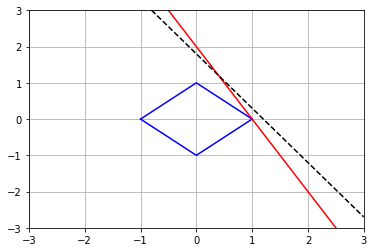

In [116]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1,1,201)
y1 = 1 - abs(x)
y2 = -1 + abs(x)

plt.plot(x,y1,'b')
plt.plot(x,y2,'b')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()


x1 = np.linspace(-3,3,601)
y3 = -2*x1 + 2
y4 = -1.5*x1 + 1.8
plt.plot(x1,y3,'r')
plt.plot(x1,y4,'k--')
plt.show()

** 案例分析 **

基于糖尿病病人数据集，进行回归分析。

数据集Diabetes:
- 包含442个患者的10个生理特征
- 10个特征变量数据均已进行规范化
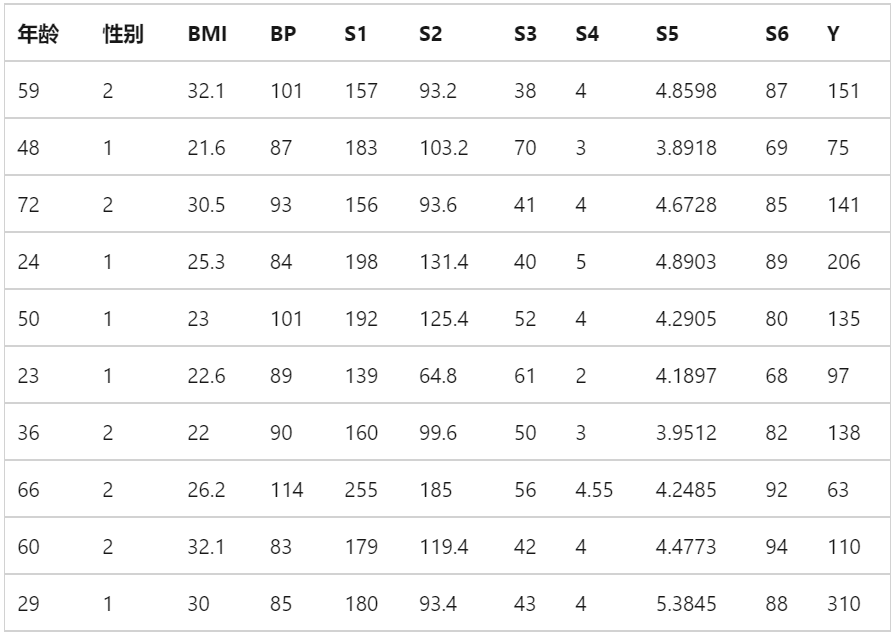

In [8]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target
xtrain,xtest,ytrain,ytest = train_test_split(data,target,test_size=0.3,random_state=10)
print(data.shape)
print(len(xtrain))

# train
# clf = linear_model.LinearRegression()
clf = Lasso(alpha = 1)
clf.fit(xtrain, ytrain)
print('model coef: ', clf.coef_)
r_sq = clf.score(xtrain, ytrain)  # 通过决定系数来来判断回归方程的拟合程度(分数越高说明拟合的程度越好)
print('r_sq:', r_sq)

# test
ypred = clf.predict(xtest)
print('test score: ', clf.score(xtest, ytest))
print('test mse = ',mean_squared_error(ytest, ypred))  # 计算预测结果


(442, 10)
309
model coef:  [  0.           0.         350.74772519   0.           0.
   0.          -0.           0.         306.96794635   0.        ]
r_sq: 0.34987776249475033
test score:  0.34723946853789145
test mse =  4130.4539469097335


** 优缺点 **

- 内在的特征选择作用(Built-in feature selection)，这是L1范数的属性。
- 稀疏性
- 计算效率高
- Lasso回归有一个很大的问题，就是它的损失函数不是连续可导的，由于L1范数用的是绝对值之和，导致损失函数有不可导的点。因此，最小二乘法，梯度下降法，牛顿法与拟牛顿法对它统统失效了。那怎么才能求有这个L1范数的损失函数极小值呢？坐标轴下降法(coordinate descent)和最小角回归法(Least Angle Regression， LARS)。

 

##### 1.4 Ridge regression

在线性回归中，如果是均方误差添加L2正则化项就是岭回归(Ridge regression)。

岭回归(ridge regression, Tikhonov regularization)是一种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。

** Definition ** 

在多元线性回归模型$y=wx+b$的均方误差上添加L2正则化项即为Ridge回归，即最小化如下的目标函数
$$ L(w,b) = \sum_{i=1}^m (wx_i+b-y_i)^2 + \alpha \|w\|_2 $$

** intution **
我们通过如下的例子来直观地感受Ridge回归的作用

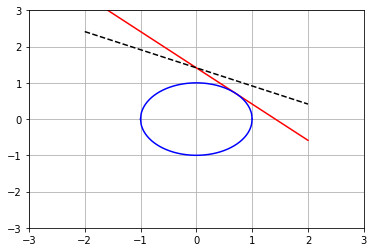

In [139]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,201)
y = np.sqrt(2) - x
y3 = np.sqrt(2) - 0.5*x
x1 = np.linspace(-1,1,201)
y1 = np.sqrt(1-x1**2)
y2 = -np.sqrt(1-x1**2)

plt.plot(x,y,'r')
plt.plot(x,y3,'k--')
plt.plot(x1,y1,'b')
plt.plot(x1,y2,'b')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
plt.show()

** 案例分析 **

* 真实模型：$ y = f(x) = x_1 + 2*x2 + 3*x_3 + 4*x_4 + 5*x_5 + 1 $

* 样本数据：$x_i \in U(-1,1) $, 均匀采样1000个点,   $y_i = f(x_i) + \epsilon, \epsilon \sim N(0,v_0)$.

In [11]:
# generate data
import numpy as np
n = 1000
fnum = 5
X = 2 * np.random.rand(n, fnum) - 1
X[:,3] = X[:,2] + np.random.randn(n,)
X[:,4] = X[:,2]
W = np.arange(1,6).reshape(fnum,1)
y = np.matmul(X,W) + 1 + 0.1 * np.random.randn(n,1)

# ridge regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)

model.fit(X, y)
ypred = model.predict(X)

# check performance
w = model.coef_
b = model.intercept_
print('w = ', w)
print('b = ',b)

w =  [[0.99614756 1.99231934 3.99302415 4.00071993 3.99302415]]
b =  [0.9962833]


** 优缺点 **
- 筛选的回归系数比较稳定，回归系数的显著性往往明显高于普通回归
- 系数整体上比较小，一定程度上解决过拟合问题
- 没有特征选择作用，也无法从根本上解决多重共线问题

##### 1.5 Linear discriminant analysis(LDA)

线性判别分析是一种经典的线性学习方法，在二分类问题上最早由Fisher提出，亦称“Fisher判别分析”。

** 基本思想 **

给定训练样本集，设法将样本投影到一条直线上，使得同类样本的投影点尽量接近、异类样本的投影点尽可能远离；在对新样本进行分类时，将其投影到同样的这条直线上，再根据投影点的位置来确定新样本的类别。一个二维的示意图如下
![LDA.png](./figures/LDA.png)

** 算法原理与流程 **
![LDA2.png](./figures/LDA2.jpg)
![LDA3.png](./figures/LDA3.jpg)
![LDA3.png](./figures/LDA4.jpg)
![LDA3.png](./figures/LDA5.jpg)

** 算法实现 **

C:\Users\shiji\software\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


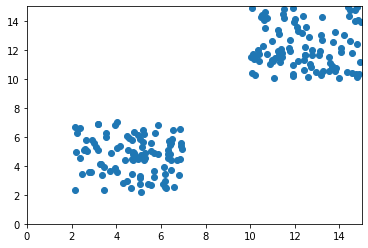

w: (2, 1)
Output:  [[1.51300166]]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算均值 
def meanX(data):
    return np.mean(data, axis=0) 

#计算类内离散度矩阵子项si
def compute_si(xi):
    n = xi.shape[0]
    ui = meanX(xi)
    si = 0
    for i in range(0, n):
        si = si + ( xi[i, :] - ui).T * (xi[i, :] - ui )   
    return si

#计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX = np.vstack((x1,x2))#合并样本   
    #计算均值
    u1 = meanX(x1)
    u2 = meanX(x2)    
    u = meanX(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb
    
        
def LDA(x1, x2):
    #计算类内离散度矩阵Sw
    s1 = compute_si(x1)
    s2 = compute_si(x2)     
    #Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2
    
    #计算类间离散度矩阵Sb
    #Sb=(n1*(m-m1).T*(m-m1)+n2*(m-m2).T*(m-m2))/(n1+n2)
    Sb = compute_Sb(x1, x2)
    
    #求最大特征值对应的特征向量    
    eig_value, vec = np.linalg.eig(np.mat(Sw).I*Sb)#特征值和特征向量
    index_vec = np.argsort(-eig_value)#对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1] #取出最大的特征值的索引
    w = vec[:, eig_index] #取出最大的特征值对应的特征向量
    return w

def createDataSet(n):  
    X1 = np.random.random((n, 2)) * 5 + 10  #类别A
    X2 = np.random.random((n, 2)) * 5 + 2   #类别B
    return X1, X2  

x1, x2 = createDataSet(100)
# show data
X = np.vstack((x1,x2)).T
fig = plt.figure()  
plt.ylim(0, 15)  
plt.xlim(0, 15)  
ax = fig.add_subplot(111)  
ax.scatter(X[0,:],X[1,:])  
plt.show() 

# LDA 训练
w = LDA(x1, x2)
print('w:', w.shape)

# LDA 测试
xtest = np.array([2, 8]) 
g = np.dot(w.T, xtest.T - 0.5 * (meanX(x1)-meanX(x2)).T)  
print("Output: ", g  )

** LDA vs PCA **

1. 相同点
    - 两者均可以对数据进行降维。

    - 两者在降维时均使用了矩阵特征分解的思想。

    - 两者都假设数据符合高斯分布。
    
2. 不同点
    - LDA是有监督的降维方法，而PCA是无监督的降维方法

    - LDA降维最多降到类别数k-1的维数，而PCA没有这个限制。

    - LDA除了可以用于降维，还可以用于分类。

    - LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向
    
![LDA6](./figures/LDA6.jpg)

#### <center> Section2 Naive Bayes classifier(NBC)


** 简介 **

1. 朴素贝叶斯法是基于贝叶斯原理和特征条件独立假设的分类方法；

2. 对于给定的训练数据集，首先基于特征独立假设学习输入输出的联合概率分布；然后基于此模型，对给定的输入z，利用贝叶斯定理求出后验概率最大的输出y；

3. 朴素贝叶斯方法实现简单，学习与预测的效率都很高，是一种常用的分类方法；

4. 朴素贝叶斯方法是一种生成式模型。


** 原理介绍 **

$\underline{\color{red}{\text{参考李航《统计学习方法》}}}$。

输入空间$\mathcal{X} \subseteq R^n$, 
输出空间$\mathcal{Y}= \{ c_1,c_2,\cdots,c_K \} $

训练数据集$D = \{x_i,y_i\}$

（1）训练时

朴素贝叶斯分类方法通过训练数据学习联合概率分布$P(X,Y)$。具体地，学习以下先验概率分布
$$P(Y=c_k),k=1,2,\cdots,K$$
和条件概率分布
$$P(X=x|Y=c_k)=P(X^{(1)}=x^{(1)},\cdots,X^{(n)}=x^{(n)}|Y=c_k),k=1,2,\cdots,K$$

条件概率分布$P(X=x|Y=c_k)$有指数量级的参数，其估计实际是不可行的，怎么办？

朴素贝叶斯方法对条件概率分布做了条件独立性的假设。这是一个很强的假设，朴素贝叶斯法也由此得名。具体地，条件独立性假设是指

$$P(X=x|Y=c_k)=P(X^{(1)}=x^{(1)},\cdots,X^{(n)}=x^{(n)}|Y=c_k)=\prod_{j=1}^nP(X^{(j)}=x^{(j)}|Y=c_k) $$

由此可见，朴素贝叶斯方法实际上学到生成数据的机制，所以属于生成模型。

（2）分类时
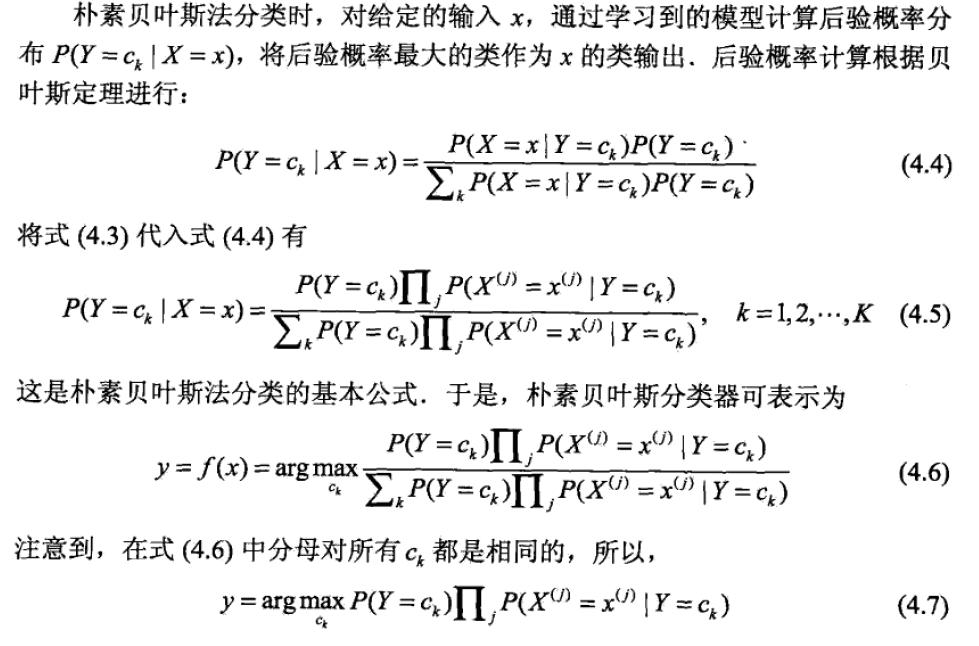



** 朴素贝叶斯方法的参数估计  **
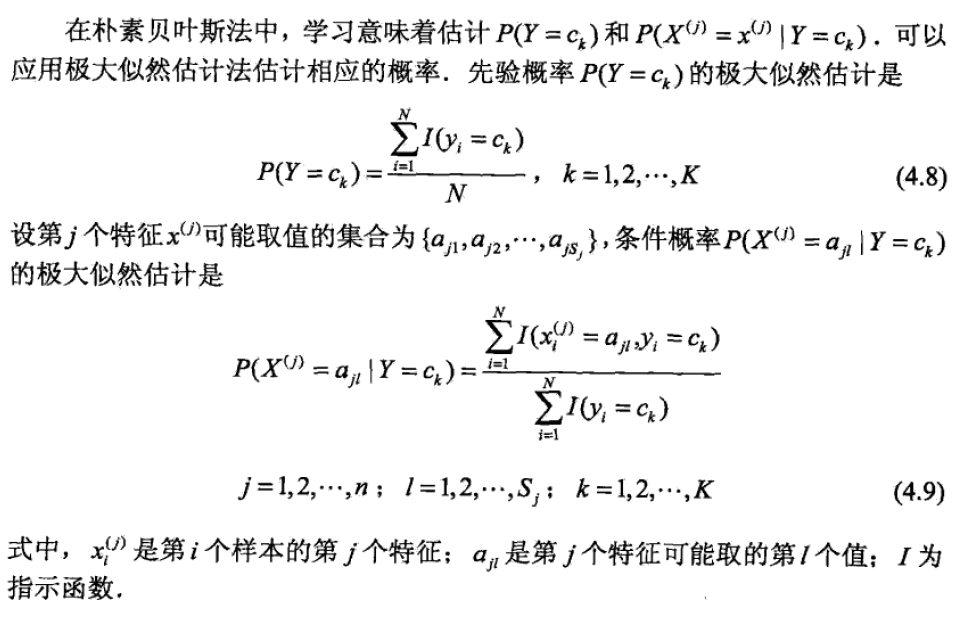


** 算法流程 **

1. 首先,计算Y的K个先验概率$P(Y=c_k)$;

2. 然后,计算条件概率分布$P(X=x|Y=c_k)=\prod_{j=1}^nP(X^{(j)}=x^{(j)}|Y=c_k) $；

3. 依据贝叶斯原理，计算Y的后验概率分布
$P(Y=c_k|X=x) = \frac{P(X=x|Y=c_k)P(Y=c_k)}{\sum_{k=1}^K P(X=x|Y=c_k)P(Y=c_k)} $,对所有k分布都相同=P(x)，实际上只需计算分子；

4. 计算$x_{test}$的类别
$$ y_{test} = \arg \max_{k} P(Y=c_k|X=x_{test})  $$



** 例子 **

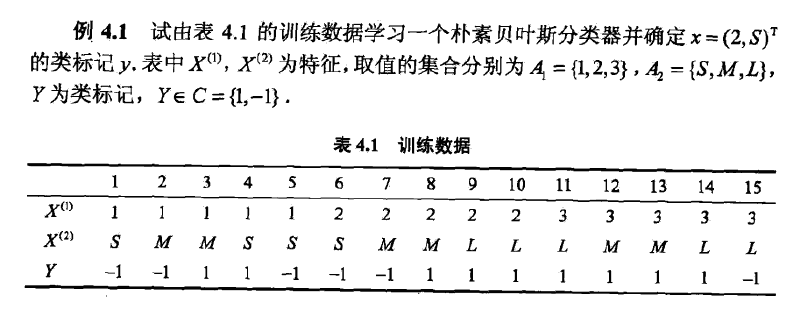


** 贝叶斯估计  **

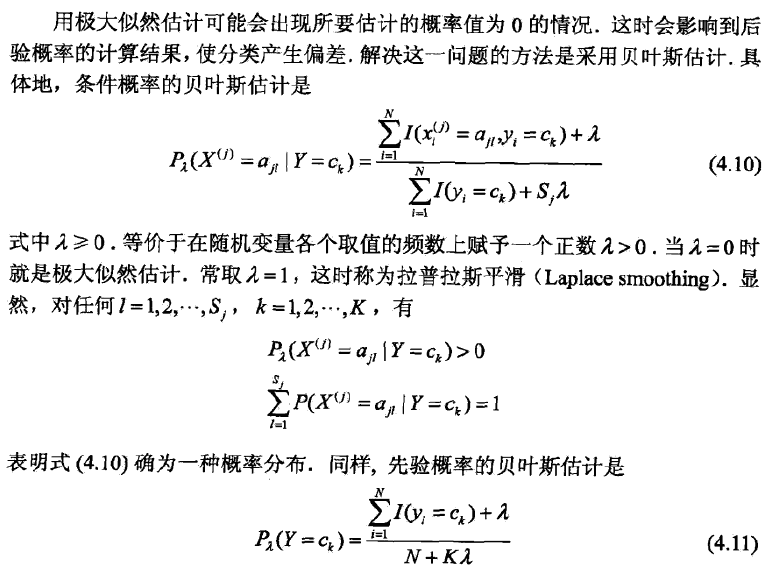

** 变种  **

（1）Bernoulli Naive Bayes
![MNB.png](./figures/BNB.png)

（2）Multi-nomial Naive Bayes
![MNB.png](./figures/MNB.png)

（3）Gauss Naive Bayes
![MNB.png](./figures/GNB.png)


** 案例实战 **

在网上找到一个言论分类的例子。

In [171]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

def getDataSet():
    """
    加载训练数据, postingList是所有的训练集, 每一个列表代表一条言论, 一共有6条言论 classVec代表每一条言论的类别,
     0是正常, 1是有侮辱性 返回 言论和类别
    :return:
    """
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    labels = [0,1,0,1,0,1]
    return postingList,labels

def createVocabList(dataSet):
    """
    创建词汇表, 就是把这个文档中所有的单词不重复的放在一个列表里面
    :param dataSet:
    :return:
    """
    vocabSet = set([])
    for data in dataSet:
        vocabSet = vocabSet | set(data) #集合求或运算
    return list(vocabSet)

def vectorize(vocabSet,dataSet):
    """
    制作词向量矩阵
    将每一个文档转换为词向量, 然后放入矩阵中
    :param vocabSet:
    :param dataSet:
    :return:
    """
    vocab = [0] * len(vocabSet)
    for data in dataSet:
        vocab[vocabSet.index(data)] = 1
    return vocab

def trainN(X_train,y_train):
    """
    制作贝叶斯分类器
    :param X_train:
    :param y_train:
    :return:
    """
    num = len(X_train)   #有多少记录
    numvocab = len(X_train[0]) #词向量的大小
    p0Num = np.ones(numvocab) #统计非侮辱类的相关单词频数 加入了拉普拉斯平滑
    p1Num = np.ones(numvocab) #统计侮辱类的相关单词频数
    p0Sum = 2
    p1Sum = 2
    pA = sum(y_train) / num                   #先验概率
    for i in range(num):
        if y_train[i]==0:   #统计属于非侮辱类的条件概率所需的数据
            p0Sum += 1
            p0Num += X_train[i]
        else:               #统计属于侮辱类的条件概率所需的数据
            p1Sum += 1
            p1Num += X_train[i]

    # 为了防止下溢出，计算条件概率的对数
    p0 = np.log(p0Num / p0Sum)      #频数除以总数 得到概率
    p1 = np.log(p1Num / p1Sum)
    return p0,p1,pA


def classify(testMat,p0,p1,pA):
    p0Score = sum(testMat * p0) +pA
    p1Score = sum(testMat * p1) +(1-pA)     #在计算概率时已经取了对数，直接求和比较比较大小
    if p0Score > p1Score:
        return 0
    else:
        return 1

#
dataSet,label = getDataSet()
vocabSet = createVocabList(dataSet)
trainMat = []
for elem in dataSet:
    trainMat.append(vectorize(vocabSet,elem))
p0,p1,pA = trainN(trainMat,label)

test1= ['love', 'my', 'dalmation']
test2= ['stupid', 'garbage','love']
test1_vocab = np.array(vectorize(vocabSet,test1))
test2_vocab = np.array(vectorize(vocabSet,test2))
result1 = classify(test1_vocab,p0,p1,pA)
result2 = classify(test2_vocab,p0,p1,pA)
print([result1, result2])

#多项式朴素贝叶斯算法
mnb = MultinomialNB(alpha=1.0)    #1拉普拉斯平滑
mnb.fit(np.array(trainMat), np.array(label).reshape(6,))
y_pred_mnb = mnb.predict(np.array([test1_vocab, test2_vocab]))
print(y_pred_mnb)

[0, 1]
[0 1]


** 优缺点 **

1. 优点：
    - 朴素贝叶斯模型发源于古典数学理论，有稳定的分类效率。
    - 对小规模的数据表现很好，能个处理多分类任务，适合增量式训练，尤其是数据量超出内存时，我们可以一批批的去增量训练。
    - 对缺失数据不太敏感，算法也比较简单，常用于文本分类。

2. 缺点：
    - 朴素贝叶斯模型的特征条件独立假设在实际应用中往往是不成立的。
    - 如果样本数据分布不能很好的代表样本空间分布，那先验概率容易测不准。
    - 对输入数据的表达形式很敏感。